In [2]:
import os
from time import time

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

from PIL import Image
from torchvision import transforms

x = torch.rand(5, 3);
y = torch.ones_like(x, dtype=torch.float)
print("x = ", x);
print("y = ", y);
print("x stored in ", x.device);

print("cuda = ", torch.cuda.is_available());
print("ver = ", torch.__version__);

x =  tensor([[0.0172, 0.6357, 0.8203],
        [0.3612, 0.6581, 0.7956],
        [0.8128, 0.0606, 0.1128],
        [0.9560, 0.1969, 0.5885],
        [0.1137, 0.8740, 0.7232]])
y =  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
x stored in  cpu
cuda =  False
ver =  1.10.1+cu113


In [46]:
f = torch.nn.Conv2d(in_channels = 2, out_channels = 3, kernel_size = 2)
print('f =', f)
print('f.w =', f.weight)
print('f.b =', f.bias)

f = Conv2d(2, 3, kernel_size=(2, 2), stride=(1, 1))
f.w = Parameter containing:
tensor([[[[-0.2055,  0.0370],
          [-0.2347, -0.3405]],

         [[-0.0636, -0.0856],
          [ 0.2693,  0.0525]]],


        [[[ 0.0614,  0.2085],
          [ 0.2603, -0.3450]],

         [[-0.3467, -0.1968],
          [ 0.1789, -0.3480]]],


        [[[-0.0979,  0.2453],
          [ 0.3219,  0.3522]],

         [[-0.2867, -0.0854],
          [-0.1855,  0.1230]]]], requires_grad=True)
f.b = Parameter containing:
tensor([-0.2146,  0.3283,  0.3328], requires_grad=True)


lambda = [-0.5+1.32287566j -0.5-1.32287566j]
X = [[0.3354102 -0.29580399j 0.3354102 +0.29580399j]
 [0.89442719+0.j         0.89442719-0.j        ]]
[0.3354102 -0.29580399j 0.89442719+0.j        ] [ 0.2236068+0.59160798j -0.4472136+1.18321596j] [ 0.2236068+0.59160798j -0.4472136+1.18321596j]
[0.3354102 +0.29580399j 0.89442719-0.j        ] [ 0.2236068-0.59160798j -0.4472136-1.18321596j] [ 0.2236068-0.59160798j -0.4472136-1.18321596j]
torch.Size([60, 3])


c:\users\moson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


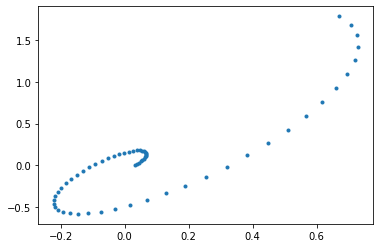

In [139]:
# ODE, x' = Ax
A = [[-2, 1], [-4, 1]]
A = np.array(A) 

lam, X = np.linalg.eig(A)
print('lambda =', lam)
print('X =', X)
v1 = X[:,0]
v2 = X[:,1]

print(v1, A@v1, lam[0] * v1)
print(v2, A@v2, lam[1] * v2)

# v(t) = v1*exp(lambda1 * t) + v2*exp(lambda2 * t)
dt = 0.1
t = np.arange(0, 6, dt)
num = len(t)
T = np.zeros([3, num])
for i in range(num):
    T[:2, i] = v1 * np.exp(lam[0]*t[i]) + v2 * np.exp(lam[1]*t[i])

T[2,:] = t
T = np.real(T)

plt.figure()
plt.plot(T[0, :], T[1, :], '.')

T = T.transpose()
T = torch.tensor(T).float()
print(T.shape)


In [214]:
tf = torch.nn.Transformer(d_model=3, nhead=1, 
                          num_encoder_layers=1, num_decoder_layers=1, dim_feedforward=64, dropout=0.1,
                          batch_first=True, norm_first=False, device=None, dtype=None)

print(tf)

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=3, out_features=3, bias=True)
        )
        (linear1): Linear(in_features=3, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=3, bias=True)
        (norm1): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0): TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=3, out_features=3, bias=True)
      

In [158]:
# convert double tensor to float and add batch dimension
x = T[:6,:].unsqueeze(0)
y = torch.zeros(1, 3).unsqueeze(0)
y[0,0,2] = x[0, -1, 2]
print('x =', x, x.size(0), x.size(1), x.size(2))
print('y =', y)
z = tf(x, y)
print('z =', z)

# load a sequence, the next prediction and the next hint from S
def get_seq(S, pos, size = 8):
    x = S[pos:(pos+size), :].unsqueeze(0)
    y = S[(pos + size):(pos + size + 1), :].unsqueeze(0)
    h = y.clone()
    h[0, 0, :2] = 0
    return x, y, h

x, y, h = get_seq(T, 0)
print('x =', x)
print('y =', y)
print('h =', h)

z = tf(x, h)
print('z =', z)

print(x[0, :-1, :])

x = tensor([[[0.6708, 1.7889, 0.0000],
         [0.7068, 1.6867, 0.1000],
         [0.7258, 1.5623, 0.2000],
         [0.7293, 1.4200, 0.3000],
         [0.7186, 1.2643, 0.4000],
         [0.6953, 1.0994, 0.5000]]]) 1 6 3
y = tensor([[[0.0000, 0.0000, 0.5000]]])
z = tensor([[[0.2281, 0.3132, 0.9293]]], grad_fn=<NativeLayerNormBackward0>)
x = tensor([[[0.6708, 1.7889, 0.0000],
         [0.7068, 1.6867, 0.1000],
         [0.7258, 1.5623, 0.2000],
         [0.7293, 1.4200, 0.3000],
         [0.7186, 1.2643, 0.4000],
         [0.6953, 1.0994, 0.5000],
         [0.6609, 0.9292, 0.6000],
         [0.6173, 0.7576, 0.7000]]])
y = tensor([[[0.5661, 0.5880, 0.8000]]])
h = tensor([[[0.0000, 0.0000, 0.8000]]])
z = tensor([[[0.2259, 0.5552, 0.7560]]], grad_fn=<NativeLayerNormBackward0>)
tensor([[0.6708, 1.7889, 0.0000],
        [0.7068, 1.6867, 0.1000],
        [0.7258, 1.5623, 0.2000],
        [0.7293, 1.4200, 0.3000],
        [0.7186, 1.2643, 0.4000],
        [0.6953, 1.0994, 0.5000],
        [0.

In [216]:
# train
S = T[:30, :]

optimizer = optim.SGD(tf.parameters(), lr = 0.003, momentum = 0.9)
criterion = nn.L1Loss()
seq = 8

time0 = time()
num = S.size(0) - seq;

for epoch in range(400):
    rloss = 0
    lst = torch.randperm(num)
    for pos in lst:
        x, y, h = get_seq(S, pos, size = seq)
        optimizer.zero_grad();
        yp = tf(x, h)
        
        # -- learning classification
        loss = criterion(y, yp) # calculate the NLL loss
        loss.backward()
        optimizer.step()
        rloss += loss.item()
        
    if epoch % 20 == 0:
        print("Epoch {} - Training loss: {}"
          .format(epoch, rloss/num))
    
time1 = time()
print('time elapsed', time1 - time0, 'sec')

Epoch 0 - Training loss: 0.14284279840913686
Epoch 20 - Training loss: 0.14595700123093344
Epoch 40 - Training loss: 0.1473800614476204
Epoch 60 - Training loss: 0.14572420199825006
Epoch 80 - Training loss: 0.1335933818905191
Epoch 100 - Training loss: 0.14356506895273924
Epoch 120 - Training loss: 0.1382864679802548
Epoch 140 - Training loss: 0.13901354309002106
Epoch 160 - Training loss: 0.13551612638614394
Epoch 180 - Training loss: 0.1348404609174891
Epoch 200 - Training loss: 0.14655335958708415
Epoch 220 - Training loss: 0.14080589603294025
Epoch 240 - Training loss: 0.13097541775046426
Epoch 260 - Training loss: 0.12714384157549252
Epoch 280 - Training loss: 0.13920530621809038
Epoch 300 - Training loss: 0.14032245706766844
Epoch 320 - Training loss: 0.13330947421491146
Epoch 340 - Training loss: 0.13396104306659914
Epoch 360 - Training loss: 0.13335935496301812
Epoch 380 - Training loss: 0.13417325846173547
time elapsed 24.028389930725098 sec


In [217]:
# prediction
X, y, h = get_seq(S, 0)
x = X.clone()

t0 = h[0, 0, 2]
print('t0 =', t0)

task = [1]
if 1 in task:
    while t0 < 6 * 1.1:
        z = tf(x, h)
        X = torch.cat((X, z), 1)
        x[0, :-1, :] = x[0, 1:, :]
        x[0, -1, :] = z
        t0 += dt
        h[0, 0, 2] = t0

if 2 in task:
    h = torch.zeros(1, 60, 3)
    for i in range(60):
        h[0, i, 2] = t0
        t0 += dt
    z = tf(x, h)
    X = torch.cat((X, z), 1)

print(X.shape)

t0 = tensor(0.8000)
torch.Size([1, 67, 3])


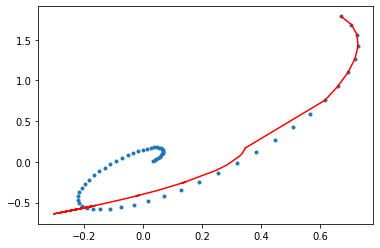

In [218]:
Y = X.detach().squeeze(0).numpy()
plt.figure()
plt.plot(T[:, 0], T[:, 1], '.')
plt.plot(Y[:, 0], Y[:, 1], 'r-')